<a href="https://colab.research.google.com/github/J0KERtry/python_repository/blob/main/%E7%AB%A0%E6%9C%AB%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## イントロダクションパート  
イントロダクションは以下の内容について記載する。  

1. 分析が必要になった背景と目的
2. 分析で使用するデータ
3. 分析で設定された課題と分析の結果  

### 1. 分析が必要になった背景と目的

#### 分析が必要になった背景  

分析が必要になった背景は以下である。  
以下の下、先述したように**満足度に寄与する要因を特定し、満足度向上のための施策を考えること**を分析の具体的な方針とする。 

<img src='https://www.kikagaku.ai/img/benesse-i-career/04/00_07.png'>  

#### 分析の目的

**自社保有のデータから顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすこと**を分析の具体的な方針とし、具体的な施策をホテルを管轄しているマネージャーに提案を行うことを目的とする。提案に際して、本分析レポートを提出する。  

なお、過去の同系列ホテルの実績から**顧客のリピート数は満足度が高いほど頻度が多いことが分かっている**とする。  





### 2. 今回使用するデータ
分析には、以下のデータを使用する。   

▼ [hotel_reviews.csv](https://drive.google.com/file/d/1Sib9dgS_mmbShkL5VHbLGwOUbEIWLhhk/view?usp=sharing)

このデータは、サンプルサイズ 10000、カラム数 14 含まれるデータである。  

<img src='https://www.kikagaku.ai/img/benesse-i-career/04/00_09.png'>  

データ内の変数は以下のようなものが含まれる。  

|  変数  |  詳細  |
| ---- | ---- |
|  性別  |  男性・女性の 2 値  |
|  年齢  |  7 ~ 80 歳までの年齢  |
|  個人/グループ  |  旅行の形態。個人またはグループのどちらか  |
|  旅行の目的  |  学生・ビジネス・航空関係・旅行・その他の 5 種類  |
|  Wifi 設備  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  送迎の便利さ  |  0 ~ 5 の 6 段階評価  |
|  オンライン予約のしやすさ  |  0 ~ 5 の 6 段階評価  |
|  ホテルの立地  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  食事の満足度  |  0 ~ 5 の 6 段階評価  |
|  滞在時の快適さ  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  チェックイン・アウトの接客  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  その他のサービス  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  清潔さ  |  0 ~ 5 の 6 段階評価  |
|  満足度  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |　　

今回分析全体の目的変数として**満足度**を使用し、その他の変数は説明変数として扱う。  

### 3. 分析で設定された課題と分析の結果  

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行う。  
データ分析の結論として以下の実施を提案する。  

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し  
- 滞在時の快適さに関する追加分析  
- 食事の満足度と清潔さに関する追加分析  



## メインパート

メインパートでは、以下について記載する。  

1. 代表値の比較  
2. 相関分析と重回帰分析による要因の特定  
3. クラスタリングよる対象の絞り込みと比較  
4. 主成分分析による可視化  
5. クラスタの代表値の比較による要因の特定と施策の考案    



In [ ]:
# 環境の準備 
!pip install -q japanize_matplotlib

In [ ]:
# 環境の準備 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
# 環境の準備 
import pandas as pd
df = pd.read_csv('hotel_reviews.csv')
df.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3


## 定性的な代表値の比較  

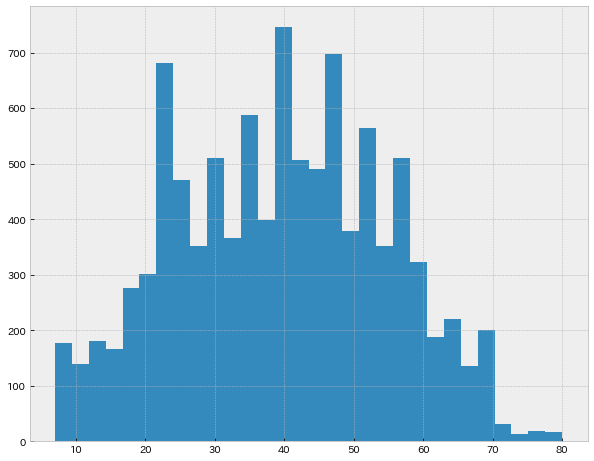

In [ ]:
# 年齢の分布

df['年齢'].hist(bins=30);

In [ ]:
# 各質的変数の個数

df_count = df[['性別', '個人/グループ', '旅行の目的']]
df_count.apply(pd.value_counts).fillna(0).tail(8)

,性別,個人/グループ,旅行の目的
グループ,0.0,6798.0,0.0
ビジネス,0.0,0.0,2078.0
個人,0.0,3202.0,0.0
女性,5031.0,0.0,0.0
学生,0.0,0.0,2573.0
旅行,0.0,0.0,3041.0
男性,4969.0,0.0,0.0
航空関係,0.0,0.0,1384.0


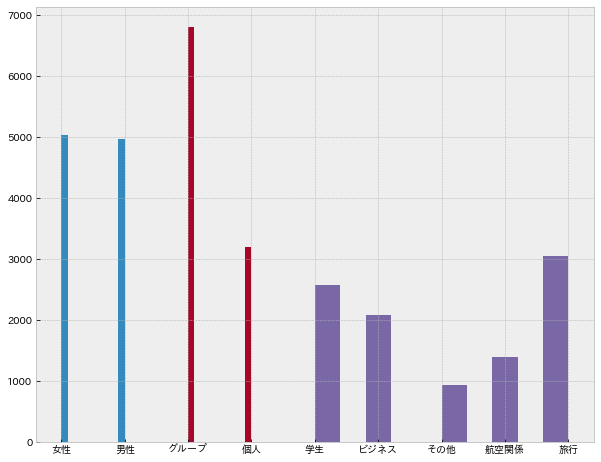

In [ ]:
# 質的変数の個数（可視化）

df['性別'].hist();
df['個人/グループ'].hist();
df['旅行の目的'].hist();

In [ ]:
#　代表値一覧
df.describe()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.486800,2.814000,3.104400,2.841000,2.989100,3.20040,3.438700,3.293900,3.646200,3.281900,3.201900
std,15.175528,1.248984,1.482404,1.331201,1.274654,1.32658,1.316441,1.261936,1.168829,1.310116,0.967176
min,7.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000
max,80.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# 満足度の平均値の高い順

mean = df.drop('年齢', axis=1).mean()
_mean = pd.DataFrame(mean.sort_values(ascending=False), columns=['満足度の平均'])
_mean

,満足度の平均
その他のサービス,3.6462
滞在時の快適さ,3.4387
チェックイン・アウトの接客,3.2939
清潔さ,3.2819
満足度,3.2019
食事の満足度,3.2004
送迎の便利さ,3.1044
ホテルの立地,2.9891
オンライン予約のしやすさ,2.8410
Wifi設備,2.8140


## 相関分析と重回帰分析による要因の特定

---


## 相関分析  

In [ ]:
# カテゴリカル変数の数値化

_df = pd.get_dummies(df, drop_first=True)
_df.head(3)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,2,0,1,1,0,0,0
2,22,1,1,1,4,1,5,1,3,1,3,0,0,0,0,0,0


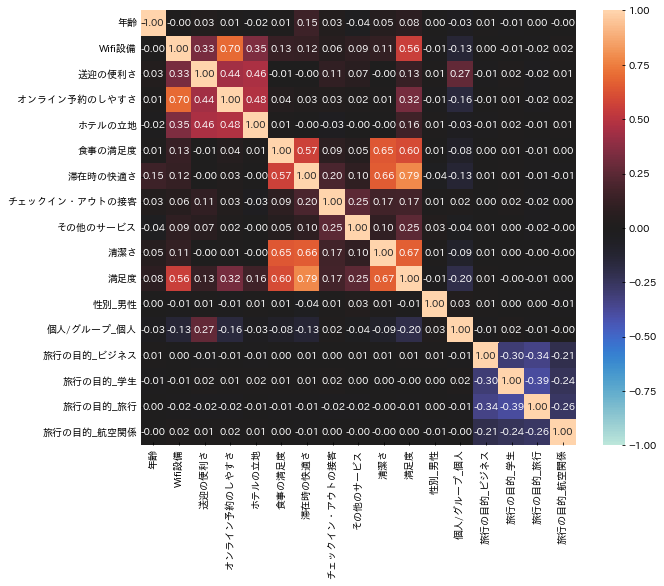

In [ ]:
# 相関分析 (ヒートマップ)

sns.heatmap(_df.corr(method = 'spearman'), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');  

In [ ]:
# `満足度`との相関が高い変数を確認する

x = _df.corr(method='spearman')['満足度']
abs(x).sort_values(ascending=False)

満足度              1.000000
滞在時の快適さ          0.788670
清潔さ              0.667490
食事の満足度           0.602178
Wifi設備           0.561347
オンライン予約のしやすさ     0.324233
その他のサービス         0.254855
個人/グループ_個人       0.196655
チェックイン・アウトの接客    0.174780
ホテルの立地           0.162102
送迎の便利さ           0.132188
年齢               0.081760
性別_男性            0.013696
旅行の目的_旅行         0.009773
旅行の目的_ビジネス       0.008473
旅行の目的_航空関係       0.000284
旅行の目的_学生         0.000191
Name: 満足度, dtype: float64

In [ ]:
# 無相関検定による統計的有意性の確認  

print(f'滞在時の快適さ × 満足度 : {stats.spearmanr(df["滞在時の快適さ"], df["満足度"])}')
print(f'清潔さ × 満足度 : {stats.spearmanr(df["清潔さ"], df["満足度"])}')
print(f'食事の満足度 × 満足度 : {stats.spearmanr(df["食事の満足度"], df["満足度"])}')
print(f'Wifi設備 × 満足度 : {stats.spearmanr(df["Wifi設備"], df["満足度"])}')

滞在時の快適さ × 満足度 : SpearmanrResult(correlation=0.7886695703694965, pvalue=0.0)
清潔さ × 満足度 : SpearmanrResult(correlation=0.6674895996550014, pvalue=0.0)
食事の満足度 × 満足度 : SpearmanrResult(correlation=0.6021781087989913, pvalue=0.0)
Wifi設備 × 満足度 : SpearmanrResult(correlation=0.5613474726971944, pvalue=0.0)


###相関分析のまとめ
####ヒートマップ
・「年齢」はほかの変数との関連がない変数だとわかる\
・「チェックイン・アウトの接客」「その他のサービス」は満足度との相関が低い\
・「食事の満足度」「滞在時の快適さ」「清潔さ」は互いに中~強程度の相関がある\
・「満足度」とは、「滞在時の快適さ」「清潔さ」「食事の満足度」「Wifi 設備」の順で相関が高い
####無相関検定
帰無仮説：母相関係数は0である\
対立仮説：母相関係数は0でない\
・どの組み合わせもｐ値が0.0と表示され、0.05未満であるため、帰無仮説が棄却されて対立仮説を採用。また、どれも満足度と中程度以上の相関がみられるため、「滞在時の快適さ」「清潔さ」「食事の満足度」「Wifi 設備」は満足度が変動する要因として関連性の高い変数だと言える







## 重回帰分析  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# 変数の選択: 目的変数→満足度、入力変数→年齢と満足度以外の数値データ  

x = _df.drop('満足度', axis=1)
y = _df['満足度']

In [ ]:
# 変数の標準化  

x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns = _df.drop('満足度', axis=1).columns)
feature.head(3)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,0.692808,0.949620,0.604184,0.870686,0.793117,-0.151073,0.426398,0.559565,0.302711,0.548147,-0.993819,-0.686310,-0.512160,1.698974,-0.661051,-0.400788
1,-0.295675,0.949620,1.278798,0.870686,0.793117,-1.658784,-1.852588,1.352038,0.302711,-1.741841,-0.993819,1.457068,1.952516,-0.588590,-0.661051,-0.400788
2,-1.152360,-1.452454,-1.419657,-1.383031,0.793117,-1.658784,1.186060,-1.817854,-0.552888,-1.741841,-0.993819,-0.686310,-0.512160,-0.588590,-0.661051,-0.400788


In [ ]:
# 重回帰分析を実行  

np.random.seed(0) # 乱数の固定
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
# 分析結果の表示   
# 自由度調整済み決定係数

result.rsquared_adj

0.917274893983254

In [ ]:
# 分析結果  (ｔ値の絶対値が2以上かつｐ値が0.05以下)

res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values[(res_values['t'].abs()>=2.0) & (res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
滞在時の快適さ,132.125668,0.000000e+00,0.527593
Wifi設備,117.969420,0.000000e+00,0.463290
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023
食事の満足度,29.853107,1.196351e-187,0.114661
ホテルの立地,3.464405,5.336381e-04,0.011694
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
個人/グループ_個人,-7.985699,1.551319e-15,-0.024688
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936


In [ ]:
# スピアマンの相関係数と比較 (相関係数の絶対値が0.5以上を表示)

tmp = df.corr(method='spearman')['満足度']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

満足度        1.000000
滞在時の快適さ    0.788670
清潔さ        0.667490
食事の満足度     0.602178
Wifi設備     0.561347
Name: 満足度, dtype: float64

### 以上より、「滞在時の快適さ」「Wifi設備」「清潔さ」「食事の満足度」の重要度が高いと判断できる

## クラスタリングよる対象の絞り込みと比較

→ 該当する問題：**Q 4**  

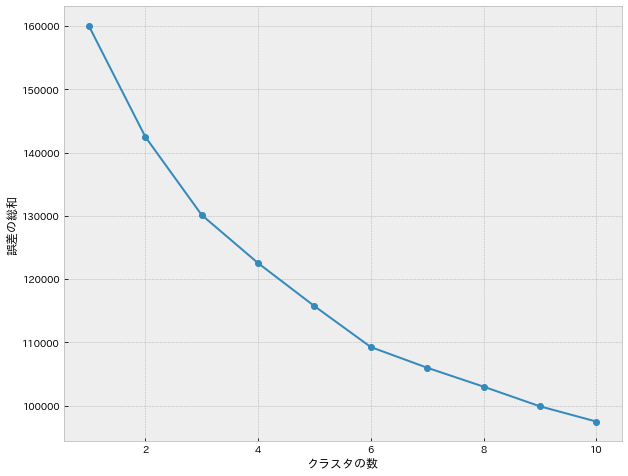

In [ ]:
# クラスタリング : エルボー法による最適なクラスタ数の計算  

from sklearn.cluster import KMeans

sse = []

for i  in range(1,11):                
    kmeans = KMeans(
        n_clusters=i,
        n_init=10,
        random_state=0
        )
    
    kmeans.fit(x_scaled)             
    sse.append(kmeans.inertia_)   

plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
# クラスタリングの実行(エルボー法)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df_clustering = df.copy() # df のデータをコピー

In [ ]:
# 変数名 `cluster` で df_clustering にクラスタリングの結果を追加

cluster = kmeans.labels_
df_clustering['cluster'] = cluster
df_clustering.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,0
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,1
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3,1


In [ ]:
# 変数 `cluster` 毎に groupby() でまとめる  

groups = df_clustering.groupby('cluster')
groups.size()

cluster
0    3614
1    3231
2    3155
dtype: int64

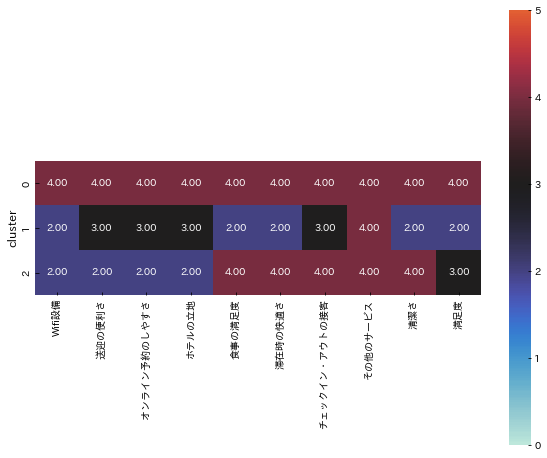

In [ ]:
# クラスタ毎の各項目の代表値を見る（中央値）: 変数`年齢`は省く

median = groups.median().drop('年齢', axis=1)

sns.heatmap(
    median,
    annot=True,
    square=True,
    vmin=0.0,
    vmax=5.0,
    center=3.0,
    fmt='.2f'
    );

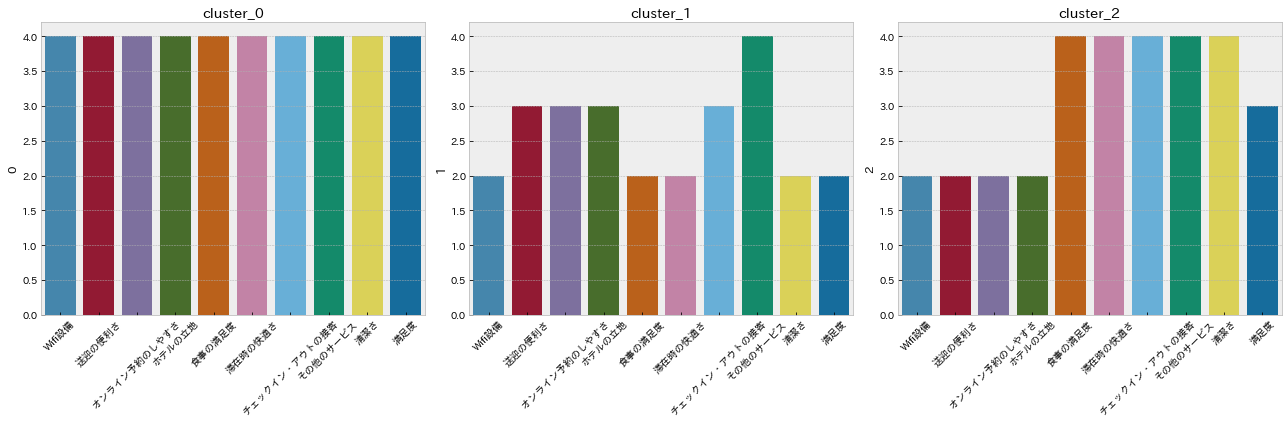

In [ ]:
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, num, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=median.columns, y=median.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()

- クラスタ0
  - すべての項目において中央値が4.0のため、高評価者のクラスタ
- クラスタ1
  - 全体的に評価が低く、目的変数である「満足度」も最も低いクラスタ
  - チェックイン・アウトの中央値は4.0であり、他のクラスタと違いがない
- クラスタ2
  - 項目によって評価に偏りが見られる
  - 「食事の満足度」「滞在時の快適さ」「その他のサービス」「清潔さ」の評価が高いため、ホテルのサービスに対する高評価クラスタである

チェックイン・アウトの接客はどのクラスタでも高評価のため、満足度に影響は少ないと考えられる。


### 主成分分析による可視化
主成分分析も併用して用い、クラスタ毎の傾向を可視化する。  


In [ ]:
# 主成分分析
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# 主成分分析 
df_numeric = df.select_dtypes(include='number')
x = df_numeric.drop(['年齢', '満足度'], axis=1)

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
# 主成分分析
pca = PCA(n_components=3, random_state=0)
feature = pca.fit_transform(x_scaled)

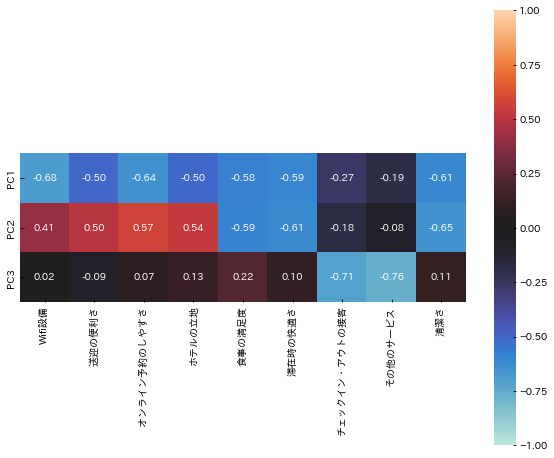

In [ ]:
# 主成分分析
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

主成分はそれぞれ、以下のように定義できる。  

- 第一主成分 : 総合評価  
- 第二主成分 : ホテルの環境評価  
- 第三主成分 : 接客の評価  

クラスタと満足度がそれぞれのサンプル毎で判別ができるように、求めた第一主成分と第二主成分をそれぞれ、x 軸 y 軸として可視化する。  

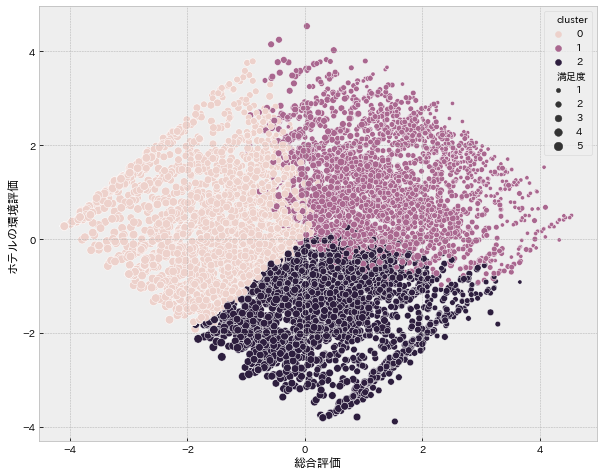

In [ ]:
# 主成分分析 
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
new_data = pd.concat([df_clustering, feature_df], axis=1)

sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

上記の様に、各クラスタは基準を持って、 3 つのグループに分割できることが分かる。特に第二主成分によって、クラスタ 1, 2 は分割可能に伺える。  
よって大枠では、「Wifi 設備」、「送迎の便利さ」、「オンライン予約のしやすさ」、「ホテルの立地」の評点群、または、「食事の満足度」、「滞在時の快適さ」、「清潔さ」の評点群のどちらかへに評価が偏る傾向がある事がわかる。  

## クラスタの代表値の比較による要因の特定と施策の考案    

ここまでで、大枠の傾向と、全体傾向としての項目の重要度を順位付けて判断することができた。  
先程、クラスタリングにより分けたクラスタ毎に傾向より詳しく読み取り、具体的な施策を考案するまでを分析する。  
基本的な方針として、各クラスタの特徴を踏まえた上で、各クラスタ毎でも共通する項目、逆に偏りのある項目、クラスタ内で目立つ方よりに注目し分析を進める。  

まずは各クラスタの相関分析からおこなう。  

In [ ]:
# 各クラスタのデータを取得
df_cluster0 = groups.get_group(0).reset_index(drop=True)
df_cluster1 = groups.get_group(1).reset_index(drop=True)
df_cluster2 = groups.get_group(2).reset_index(drop=True)

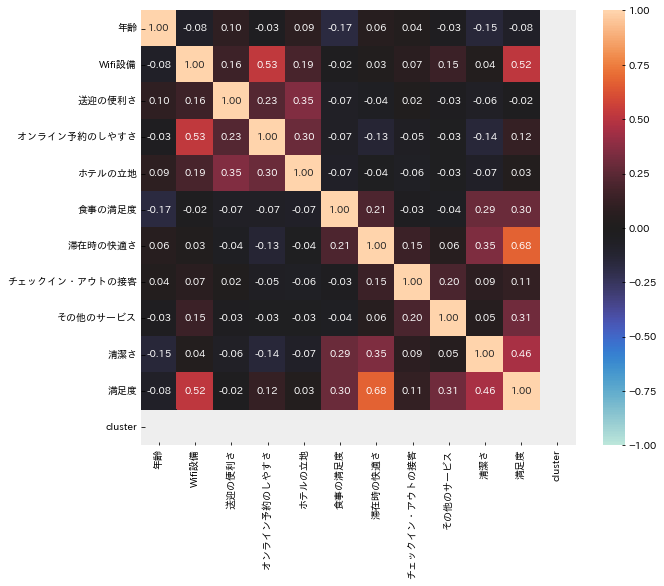

In [ ]:
# クラスタ 0 （df_cluster0）の相関

sns.heatmap(df_cluster0.corr(),  square=True, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

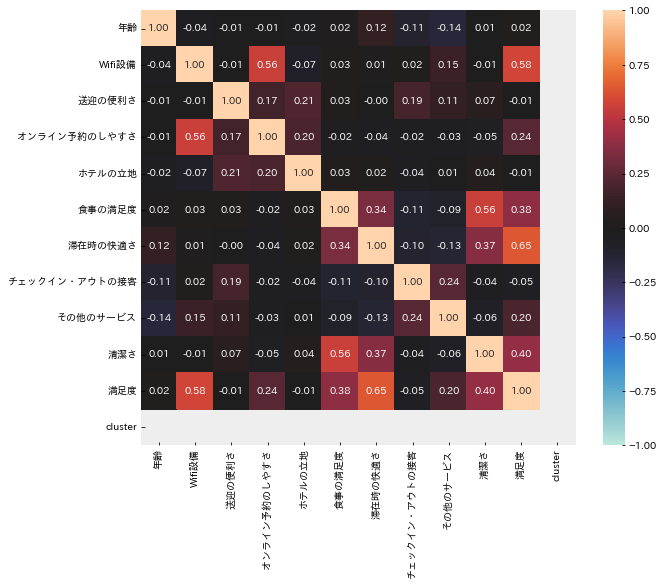

In [ ]:
# クラスタ 1 （df_cluster1）の相関

sns.heatmap(df_cluster1.corr(),  square=True, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

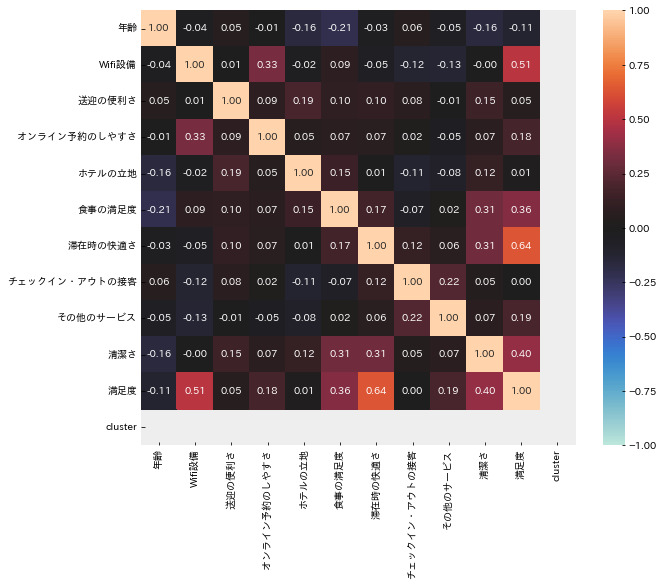

In [ ]:
# クラスタ 2 （df_cluster2）の相関

sns.heatmap(df_cluster2.corr(),  square=True, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')

顧客の属性による評価の違いも考慮して、定性的に代表値の比較を行う。  
代表値には中央値を使用する。  

In [ ]:
# クラスタ 0 の満足度内訳 
df_cluster0['満足度'].value_counts()

4    2165
3     763
5     646
2      40
Name: 満足度, dtype: int64

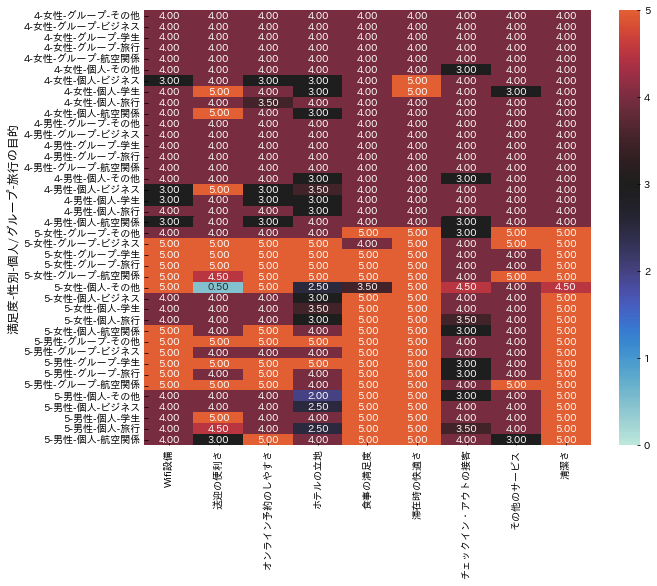

In [ ]:
#クラスタ 0 （cluster 0 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件つき

_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')
_df = _df.drop(['cluster', '年齢'], axis=1)

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [ ]:
# クラスタ 1 の満足度内訳 
df_cluster1['満足度'].value_counts()

2    1680
3    1112
1     392
4      47
Name: 満足度, dtype: int64

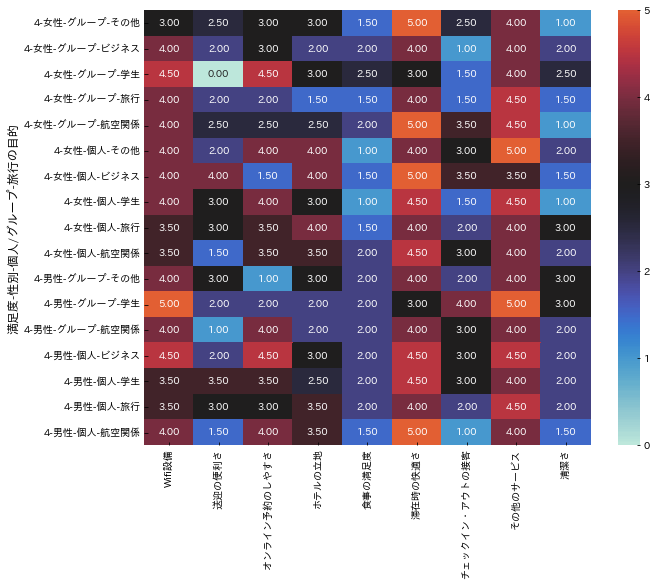

In [ ]:
#クラスタ 1 （cluster 1 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件つき

_df = df_cluster1.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')
_df = _df.drop(['cluster', '年齢'], axis=1)

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [ ]:
# クラスタ 2 の満足度内訳  : 実行してください 
df_cluster2['満足度'].value_counts()

3    1691
4    1137
2     256
5      70
1       1
Name: 満足度, dtype: int64

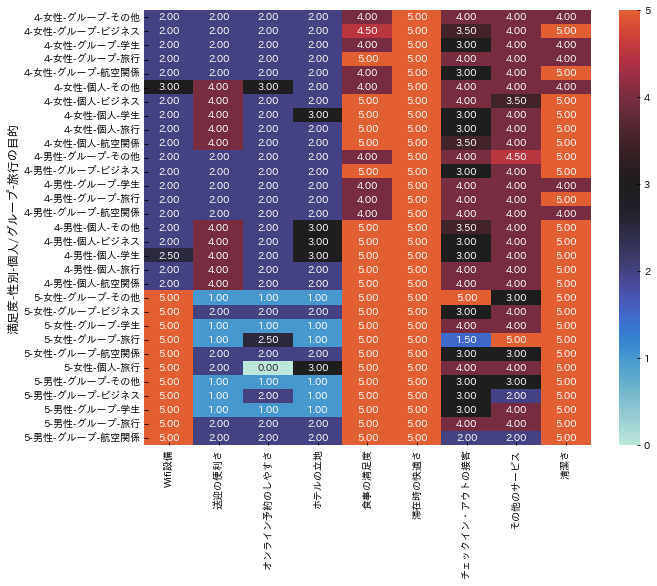

In [ ]:
#クラスタ 2 （cluster 2 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件つき
  
_df = df_cluster2.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')
_df = _df.drop(['cluster', '年齢'], axis=1)

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

各クラスタにおいて、満足度が高評価であるサンプルに共通しているのは、`Wifi 設備`、`滞在時の快適さ`の評点が高いことである。  
どの様なお客様に対しても共通して効果が大きいのは上記 2 つに対して改善策を講じることだと判断できる。  



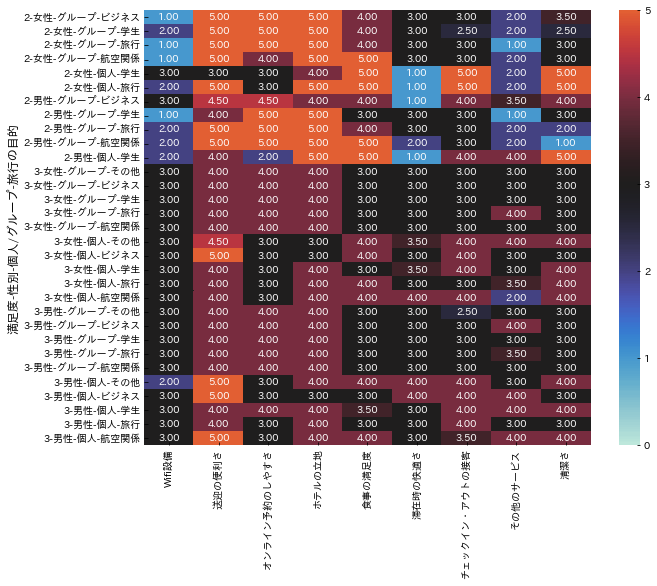

In [ ]:
#クラスタ 0 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  

_df = df_cluster0.groupby(['満足度','性別','個人/グループ','旅行の目的']).median().query('満足度<=3')
_df = _df.drop(['年齢', 'cluster'], axis=1)
sns.heatmap(_df, vmin=0, vmax=5, center=3, annot=True, fmt='.2f');

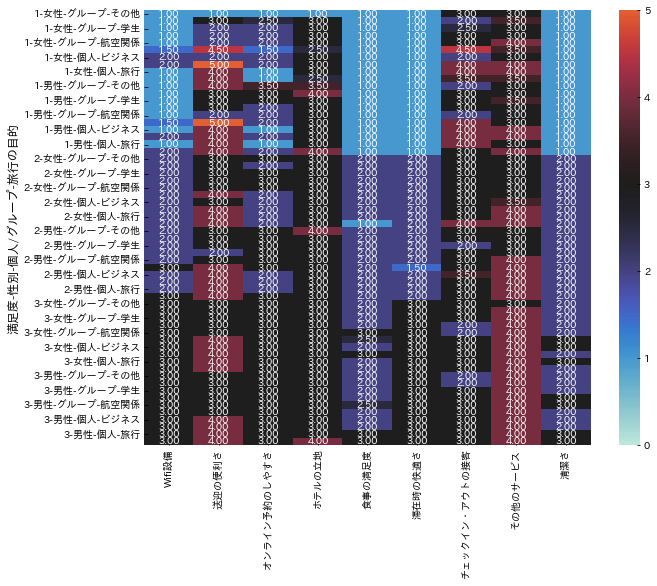

In [ ]:
#クラスタ 1 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  

_df = df_cluster1.groupby(['満足度','性別','個人/グループ','旅行の目的']).median().query('満足度<=3')
_df = _df.drop(['年齢', 'cluster'], axis=1)
sns.heatmap(_df, vmin=0, vmax=5, center=3, annot=True, fmt='.2f');

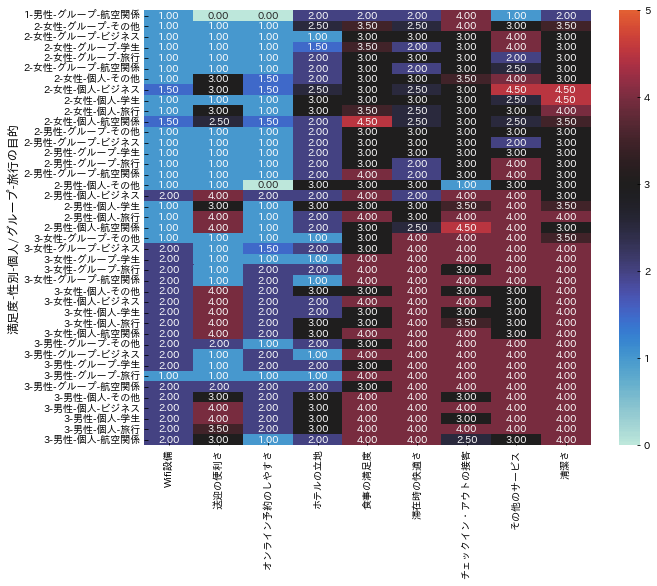

In [ ]:
#クラスタ 2 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較   

_df = df_cluster2.groupby(['満足度','性別','個人/グループ','旅行の目的']).median().query('満足度<=3')
_df = _df.drop(['年齢', 'cluster'], axis=1)
sns.heatmap(_df, vmin=0, vmax=5, center=3, annot=True, fmt='.2f');

上記それぞれの結果を踏まえ各要因を以下の 4 つに分類する。  

1. 優先度高く改善を行う項目  
2. 第二優先項目として改善を行う項目  
3. 現在のサービス品質の継続を目指す項目  
4. 優先度を下げるまたは考慮しない項目      

----------------------------
1. 優先度高く改善を行う項目    
→ Wifi設備、滞在時の快適さ
  - 両者とも満足度との正の相関が見られ、クラスタによらず2つの評価が高いと満足度も高くなる傾向がある
  - Wifi設備に関して、中央値のヒートマップを確認すると、個人とグループでは個人のサンプルのほうが低い評点の傾向あり
  - 滞在時の快適さは具体的な要因がわからないため、深堀りする必要あり

2. 第二優先項目として改善を行う項目    
→ 食事の満足度、清潔さ
  - クラスタによってはこの2つの評価が高いと満足度も高くなる傾向がある
  - 食事や清潔さは実際の業務内容でさらに細分化できるため、データにない部分の要因を考える必要あり
  - 個人・グループ、性別、旅行の目的によって傾向に違いが見られないが、クラスタによって違いが見られるので第二優先と判断

  
3. 現在のサービス品質の維持を目指す項目   
→ 送迎の便利さ、チェックイン・アウトの接客、その他のサービス
  - 基本的に満足度によらず、中央値比較では3～4の評点が多いので現在のサービスを落とさないことを優先するべき


4. 優先度を下げるまたは考慮しない項目 
→ ホテルの立地、チェックイン・アウトの接客
  - これらの項目は優先して改善できるようなものではないので優先順位を下げるべき


## まとめパート  

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行った。  

データ分析の結論として以下の実施を提案する。  

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し  
- 滞在時の快適さに関する追加分析  
- 食事の満足度と清潔さに関する追加分析  
